# Camera calibration

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        print("processed "+fname)

# save the parameter for future use
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
cal_cam = {}
cal_cam['ret'] = ret
cal_cam['mtx'] = mtx
cal_cam['dist'] = dist
cal_cam['rvecs'] = rvecs
cal_cam['tvecs'] = tvecs
with open("cal_cam.p", "wb") as file:
    pickle.dump(cal_cam, file)
print("finished")

# Setup

In [1]:
# load modules and files
# setup global variables like file paths
# load camera calibration matrix and distortion coefficients
import pickle
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os.path import join
%matplotlib inline
print("modules loaded")

# load camera calibration matrix and distortion coefficients
# for image undistortion
with open("cal_cam.p", "rb") as file:
    cal_cam = pickle.load(file)
    ret = cal_cam['ret']
    mtx = cal_cam['mtx']
    dist = cal_cam['dist']
    rvecs = cal_cam['rvecs'] 
    tvecs = cal_cam['tvecs']
    
print("finished")

modules loaded
finished


# Distortion correction

In [2]:
# input a image
# output undistorted image
def distortion_correction(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

print("finish")

finish


In [18]:
# test case
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    print("processing "+fname)
    wname = "test_images/undist_"+str(idx+1)+".jpg"
    undist = distortion_correction(img, mtx, dist)
    cv2.imwrite(wname, undist)

processing test_images/test01.jpg
processing test_images/test02.jpg
processing test_images/test03.jpg
processing test_images/test04.jpg
processing test_images/test05.jpg
processing test_images/test06.jpg
processing test_images/test07.jpg
processing test_images/test08.jpg
processing test_images/test09.jpg
processing test_images/test10.jpg
processing test_images/test11.jpg
processing test_images/test12.jpg
processing test_images/test13.jpg
processing test_images/test14.jpg
processing test_images/test15.jpg
processing test_images/test16.jpg
processing test_images/test17.jpg


# Perspective transform

In [3]:
# input a color or gray scale image of the road (1280*720)
# output the bird_view the road, for finding lane line
# if reverse = True, it converts bird view image back to original perspective
def warper(img, reverse = False):
    xsize = img.shape[1]
    ysize = img.shape[0]
    
    # set up box boundary
    xmid = xsize/2 # middle point
    upper_margin = 85 # upper width
    lower_margin = 490 # lower width
    upper_bound = 460 # upper value of y
    lower_bound = 670 # bottom value of y
    dst_margin = 450 # bird view width
    
    # source points
    p1_src = [xmid - lower_margin, lower_bound]
    p2_src = [xmid - upper_margin, upper_bound]
    p3_src = [xmid + upper_margin, upper_bound]
    p4_src = [xmid + lower_margin,lower_bound]
    src = np.array([p1_src, p2_src, p3_src, p4_src], dtype=np.float32)
    
    # distination points
    p1_dst = [xmid - dst_margin, ysize]
    p2_dst = [xmid - dst_margin, 0]
    p3_dst = [xmid + dst_margin, 0]
    p4_dst = [xmid + dst_margin, ysize]
    dst = np.array([p1_dst, p2_dst, p3_dst, p4_dst], dtype=np.float32)
    
    if(not reverse):
        # if we need to change to bird view 
        # given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
    else:
        # else switch src and dst, change back from bird view
        M = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), cv2.INTER_LINEAR)
    return warped

print("loaded")

loaded


image shape:  (720, 1280, 3)
processing test_images/test01.jpg
processing test_images/test02.jpg
processing test_images/test03.jpg
processing test_images/test04.jpg
processing test_images/test05.jpg
processing test_images/test06.jpg
processing test_images/test07.jpg
processing test_images/test08.jpg
processing test_images/test09.jpg
processing test_images/test10.jpg
processing test_images/test11.jpg
processing test_images/test12.jpg
processing test_images/test13.jpg
processing test_images/test14.jpg
processing test_images/test15.jpg
processing test_images/test16.jpg
processing test_images/test17.jpg
finished


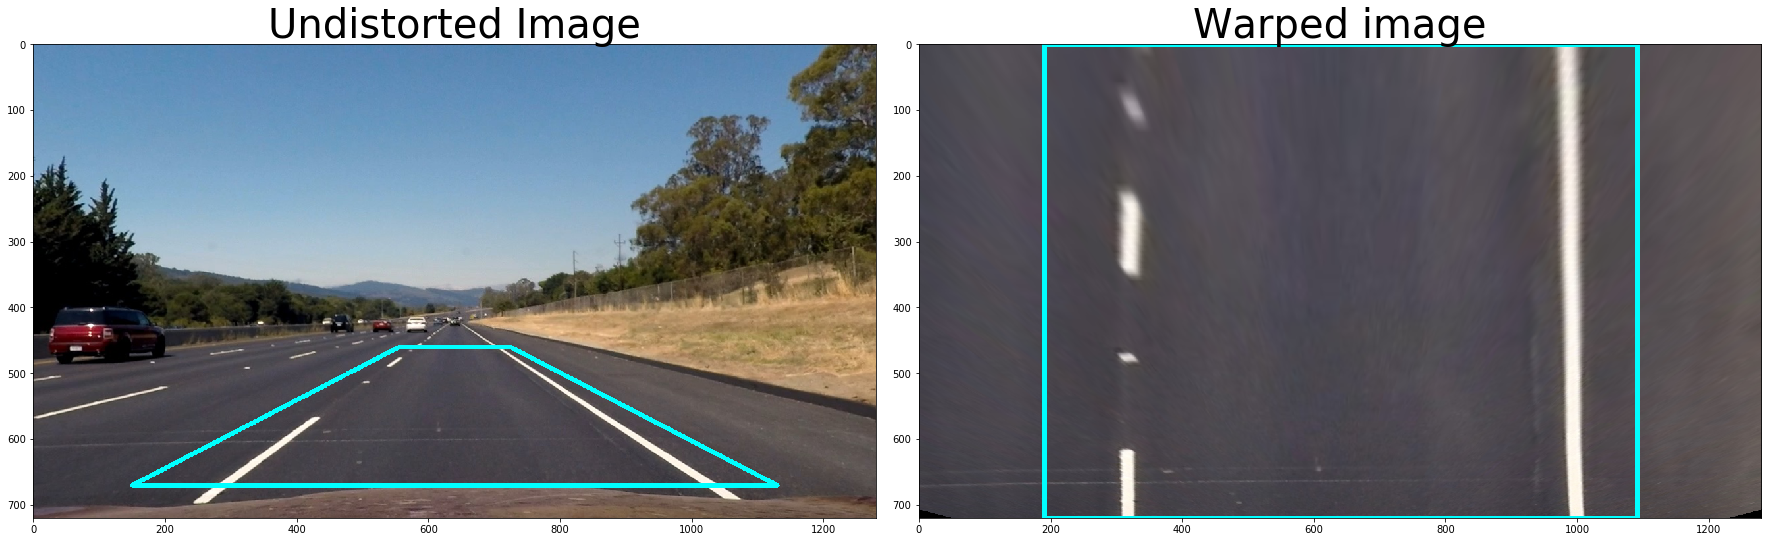

In [4]:
# test case
img = mpimg.imread("test_images/test08.jpg")
print("image shape: ", img.shape)

xsize = img.shape[1]
ysize = img.shape[0]

xmid = xsize/2
upper_margin = 85
lower_margin = 490
upper_bound = 460
lower_bound = 670
dst_margin = 450

p1_src = [xmid - lower_margin, lower_bound]
p2_src = [xmid - upper_margin, upper_bound]
p3_src = [xmid + upper_margin, upper_bound]
p4_src = [xmid + lower_margin,lower_bound]
src = np.array([p1_src, p2_src, p3_src, p4_src], dtype=np.float32)
src_draw = np.array([p1_src, p2_src, p3_src, p4_src], dtype=np.int32)

p1_dst = [xmid - dst_margin, ysize]
p2_dst = [xmid - dst_margin, 0]
p3_dst = [xmid + dst_margin, 0]
p4_dst = [xmid + dst_margin, ysize]
dst = np.array([p1_dst, p2_dst, p3_dst, p4_dst], dtype=np.float32)
dst_draw = np.array([p1_dst, p2_dst, p3_dst, p4_dst], dtype=np.int32)

src_draw = src_draw.reshape((-1,1,2))
dst_draw = dst_draw.reshape((-1,1,2))

undist = distortion_correction(img, mtx, dist)
warped = warper(undist)

cv2.polylines(undist,[src_draw],True,(0,255,255),thickness=5)
cv2.polylines(warped,[dst_draw],True,(0,255,255),thickness=5)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undist)
ax1.set_title('Undistorted Image', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Warped image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    print("processing "+fname)
    wname = "test_images/warped_"+str(idx+1)+".jpg"
    undist = distortion_correction(img, mtx, dist)
    warped = warper(undist)
    cv2.imwrite(wname, warped)

print("finished")

# Color threshold

In [5]:
# find white lane line in the bird view image
# convert to HSV and threshold the image
# assume BGR color space input
def white_lane_line(img):
    img = np.copy(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert to HSV color space
    # 3 different threshold for different lighting condition
    # high light , color = B, used in normal light condition
    lower_1 = np.array([0, 0, 200])
    upper_1 = np.array([255, 25, 255])
    # high light , color = G, not used, saved for future experiment
    lower_2 = np.array([0, 0, 200])
    upper_2 = np.array([255, 25, 255])
    # low h low s low v , color = R, used in low light condition
    lower_3 = np.array([0, 0, 170])
    upper_3 = np.array([255, 20, 190])
    white_1 = cv2.inRange(hsv, lower_1, upper_1)
    white_2 = cv2.inRange(hsv, lower_2, upper_2)
    white_3 = cv2.inRange(hsv, lower_3, upper_3)
#     print("# pixel at w 1: ", len(white_1.nonzero()[0]))
#     print("# pixel at w 2: ", len(white_2.nonzero()[0]))
#     print("# pixel at w 3: ", len(white_3.nonzero()[0]))
    if(len(white_1.nonzero()[0]) > 4000):
#         print("strong white pixel at level 1")
        white_3 = np.zeros_like(white_1)
    if(len(white_2.nonzero()[0]) > 40000): # too much false detection
#         print("too much white pixel at level 2")
        white_2 = np.zeros_like(white_1)
    if(len(white_3.nonzero()[0]) > 40000): # too much false detection
#         print("too much white pixel at level 3")
        white_3 = np.zeros_like(white_1)
    
    return white_1, white_2, white_3


print("loaded")

loaded


In [6]:
# test case
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    print("processing "+fname)
    wname = "test_images/white_thresh_"+str(idx+1)+".jpg"
    undist = distortion_correction(img, mtx, dist)
    warped = warper(undist)
    white_1, white_2, white_3 = white_lane_line(warped)
    result = np.zeros_like(warped)
    result[:,:,0] = white_1
    result[:,:,1] = white_2
    result[:,:,2] = white_3
    cv2.imwrite(wname, result)

print("finished")


processing test_images/test01.jpg
processing test_images/test02.jpg
processing test_images/test03.jpg
processing test_images/test04.jpg
processing test_images/test05.jpg
processing test_images/test06.jpg
processing test_images/test07.jpg
processing test_images/test08.jpg
processing test_images/test09.jpg
processing test_images/test10.jpg
processing test_images/test11.jpg
processing test_images/test12.jpg
processing test_images/test13.jpg
processing test_images/test14.jpg
processing test_images/test15.jpg
processing test_images/test16.jpg
processing test_images/test17.jpg
finished


In [7]:
# find yellow lane line in the bird view image
# convert to HSV and threshold the image
# assume BGR color space input
def yellow_lane_line(img):
    img = np.copy(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float) # convert to HSV color space
    # color = B, high s high v, used in normal light condition
    lower_1 = np.array([ 0, 100, 100])
    upper_1 = np.array([ 50, 255, 255])
    # color = G, low s low v, used in low light condition
    lower_2 = np.array([ 10, 35, 100])
    upper_2 = np.array([ 40, 80, 180])
    # color = R, low s high v, used in extreme high light condition
    lower_3 = np.array([ 15, 30, 150])
    upper_3 = np.array([ 45, 80, 255])
    yellow_1 = cv2.inRange(hsv, lower_1, upper_1)
    yellow_2 = cv2.inRange(hsv, lower_2, upper_2)
    yellow_3 = cv2.inRange(hsv, lower_3, upper_3)
#     print("# pixel at y 1: ", len(yellow_1.nonzero()[0]))
#     print("# pixel at y 2: ", len(yellow_2.nonzero()[0]))
#     print("# pixel at y 3: ", len(yellow_3.nonzero()[0]))
    if(len(yellow_1.nonzero()[0]) > 30000):
#         print("string yellow")
        yellow_2 = np.zeros_like(yellow_1)
        yellow_3 = np.zeros_like(yellow_1)
    if(len(yellow_2.nonzero()[0]) > 30000):
#         print("too many y 2")
        yellow_2 = np.zeros_like(yellow_1)
    if(len(yellow_3.nonzero()[0]) > 30000):
#         print("too many y 3")
        yellow_3 = np.zeros_like(yellow_1)
    return yellow_1, yellow_2, yellow_3

print("loaded")

loaded


In [8]:
# test case
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    print("processing "+fname)
    wname = "test_images/yellow_thresh_"+str(idx+1)+".jpg"
    undist = distortion_correction(img, mtx, dist)
    warped = warper(undist)
    yellow_1, yellow_2, yellow_3 = yellow_lane_line(warped)
    result = np.zeros_like(undist)
    result[:,:,0] = yellow_1
    result[:,:,1] = yellow_2
    result[:,:,2] = yellow_3
    cv2.imwrite(wname, result)

print("finished")


processing test_images/test01.jpg
processing test_images/test02.jpg
processing test_images/test03.jpg
processing test_images/test04.jpg
processing test_images/test05.jpg
processing test_images/test06.jpg
processing test_images/test07.jpg
processing test_images/test08.jpg
processing test_images/test09.jpg
processing test_images/test10.jpg
processing test_images/test11.jpg
processing test_images/test12.jpg
processing test_images/test13.jpg
processing test_images/test14.jpg
processing test_images/test15.jpg
processing test_images/test16.jpg
processing test_images/test17.jpg
finished


# Locate lane line

In [9]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False
        # the last n fits of the line
        self.recent_left_fit = []
        self.recent_right_fit = []
        #polynomial coefficients for the most recent fit
        self.current_left_fit = [np.array([False])]
        self.current_right_fit = [np.array([False])]
    
    # return best fitting coefficients, which average the last 3 True dection
    def get_fit(self):
        cur_left_fit = np.average(self.recent_left_fit[-3:], axis=0)
        cur_right_fit = np.average(self.recent_right_fit[-3:], axis=0)
        return cur_left_fit, cur_right_fit
    
    def get_deviation(self):
        left_fit, right_fit = self.get_fit()
        base = 719
        middle = 1279/2
        xm_per_pix = 3.7/650 # meters per pixel in x dimension
        left_base = left_fit[0]*base**2 + left_fit[1]*base + left_fit[2]
        right_base = right_fit[0]*base**2 + right_fit[1]*base + right_fit[2]
        deviation = ((right_base - left_base) - middle) * xm_per_pix
        return deviation

    # return curvature
    def get_curvature(self):
        left_fit, right_fit = self.get_fit()
        # Generate some fake data to represent lane-line pixels
        ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
        l_quadratic_coeff = left_fit[0] # arbitrary quadratic coefficient
        r_quadratic_coeff = right_fit[0]
        # For each y position generate random x position within +/-50 pix
        # of the line base position in each case (x=200 for left, and x=900 for right)
        leftx = np.array([200 + (y**2)*l_quadratic_coeff + np.random.randint(-50, high=51) 
                                      for y in ploty])
        rightx = np.array([900 + (y**2)*r_quadratic_coeff + np.random.randint(-50, high=51) 
                                        for y in ploty])

        leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
        rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


        # Fit a second order polynomial to pixel positions in each fake lane line
        left_fit = np.polyfit(ploty, leftx, 2)
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fit = np.polyfit(ploty, rightx, 2)
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


        # Define y-value where we want radius of curvature
        # I'll choose the maximum y-value, corresponding to the bottom of the image
        y_eval = np.max(ploty)

        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/650 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
        # Example values: 632.1 m    626.2 m
        return left_curverad, right_curverad
    
    # input 3 channel warped image: warped[yellow,white,sobel]
    # calculate fitting coefficients
    # set to self.current_left_fit and self.current_right_fit
    def find_lane(self, warped):
        # if fail to dection lane lines in last frame, we use slide window to blind search
        # otherwise we search lane line within a margin define by best fitting coefficients
        if(not self.detected):
            detect = self.blind_search(warped)
        else:
            detect = self.margin_search(warped)
            
        left_fit = self.current_left_fit 
        right_fit = self.current_right_fit
        
        # sanity check pipeline
        # check base distance
        base = 720
        left_base = left_fit[0]*base**2 + left_fit[1]*base + left_fit[2]
        right_base = right_fit[0]*base**2 + right_fit[1]*base + right_fit[2]
        if(right_base < left_base or np.absolute((right_base - left_base) - 650) >= 200):
            detect = False
        # check derivative difference
        if(np.absolute((2*left_fit[0]+left_fit[1]) - (2*right_fit[0]+right_fit[1])) >= 0.8):
            detect = False
        # force to append the first few detection    
        if(len(self.recent_left_fit) < 3 or len(self.recent_right_fit) < 3):
            detect = False
            self.recent_left_fit.append(left_fit)
            self.recent_right_fit.append(right_fit)
        # if it is a real dection, we add to recent detection
        if(detect):
            self.detected = True
            self.recent_left_fit.append(left_fit)
            self.recent_right_fit.append(right_fit)
        else:
            self.detected = False
    
    # input 3 channel warped image warped[y,w,s]
    # use slide window method to search lane lines
    def blind_search(self, warped):
#         print("blind search")
        # Assuming you have created a warped binary image called "binary_warped"
        binary_warped = np.sum(warped, axis=2) # collapse 3 channel into 1
        binary_y = warped[:,:,0]
        binary_w = warped[:,:,1]
        # Take a histogram of the bottom half of the image
        histogram_l = np.sum(binary_y[binary_y.shape[0]/2:,:], axis=0)
        histogram_r = np.sum(binary_w[binary_w.shape[0]/2:,:], axis=0)
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram_l.shape[0]/2)
        leftx_base = np.argmax(histogram_l[:midpoint])
        rightx_base = np.argmax(histogram_r[midpoint:]) + midpoint
        
        # detect lane line using sliding window
        # window size: 80*200
        # Choose the number of sliding windows
        nwindows = 9
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero_l = binary_y.nonzero()
        nonzeroy_l = np.array(nonzero_l[0])
        nonzerox_l = np.array(nonzero_l[1])
        nonzero_r = binary_w.nonzero()
        nonzeroy_r = np.array(nonzero_r[0])
        nonzerox_r = np.array(nonzero_r[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []
        
        leftx = []
        lefty = []
        rightx = []
        righty =  []
        
        # points of current fit
#         yvals = np.arange(binary_warped.shape[0]-(window_height/2), 0, -window_height)
        cur_left_fit, cur_right_fit = self.get_fit()

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            cv2.rectangle(warped,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(warped,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy_l >= win_y_low) & (nonzeroy_l < win_y_high) & (nonzerox_l >= win_xleft_low) & (nonzerox_l < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy_r >= win_y_low) & (nonzeroy_r < win_y_high) & (nonzerox_r >= win_xright_low) & (nonzerox_r < win_xright_high)).nonzero()[0]

            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if(len(good_left_inds) > minpix):
                leftx_current = np.int(np.mean(nonzerox_l[good_left_inds]))
            if(len(good_right_inds) > minpix):        
                rightx_current = np.int(np.mean(nonzerox_r[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)

        # Extract left and right line pixel positions
        leftx = nonzerox_l[left_lane_inds]
        lefty = nonzeroy_l[left_lane_inds] 
        rightx = nonzerox_r[right_lane_inds]
        righty = nonzeroy_r[right_lane_inds]

        detect = True
        if(len(leftx) > 1000 or len(self.recent_left_fit) < 1):
            self.current_left_fit = np.polyfit(lefty, leftx, 2)
        else: # not enough point to suggest a good fit, use last fit
            print("left blind search fail")
            self.current_left_fit = cur_left_fit
            detect = False
        if(len(rightx) > 1000 or len(self.recent_right_fit) < 1):
            self.current_right_fit = np.polyfit(righty, rightx, 2)
        else: # not enough point to suggest a good fit, use last fit
            print("right blind search fail")
            self.current_right_fit = cur_right_fit
            detect = False
        return detect    
    
    # input 3 channel warped image
    # use best fit coefficients to restrict search area
    def margin_search(self, warped):
#         print("marginal search")
        # Assuming you have created a warped binary image called "binary_warped"
        binary_warped = np.sum(warped, axis=2) # collapse 3 channel into 1
        binary_y = warped[:,:,0]
        binary_w = warped[:,:,1]
        
        # detect lane line using sliding window
        # window size: 80*100
        # Choose the number of sliding windows
        nwindows = 9
        # Set the width of the windows +/- margin
        margin = 100
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        
        # Set minimum number of pixels found to recenter window
        minpix = 50
        maxpix = 6000

        
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero_l = binary_y.nonzero()
        nonzeroy_l = np.array(nonzero_l[0])
        nonzerox_l = np.array(nonzero_l[1])
        nonzero_r = binary_w.nonzero()
        nonzeroy_r = np.array(nonzero_r[0])
        nonzerox_r = np.array(nonzero_r[1])
        
        leftx = []
        lefty = []
        rightx = []
        righty =  []
        
        # points of current fit
        cur_left_fit, cur_right_fit = self.get_fit()
        yvals = np.linspace(0, 719, num=720, dtype=np.int32)# to cover same y-range as image
        l_xvals = []
        r_xvals = []
        for y in yvals:
            l_xvals.append(cur_left_fit[0]*y**2 + cur_left_fit[1]*y + cur_left_fit[2] + np.random.randint(-50, high=51))
            r_xvals.append(cur_right_fit[0]*y**2 + cur_right_fit[1]*y + cur_right_fit[2] + np.random.randint(-50, high=51))
        l_xvals = np.array(l_xvals, dtype=np.int32)
        r_xvals = np.array(r_xvals, dtype=np.int32)  
        # Step through the windows one by one
        l_base_missing = 0
        r_base_missing = 0
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            
            leftx_current = np.int(cur_left_fit[0]*win_y_high**2 + cur_left_fit[1]*win_y_high + cur_left_fit[2])
            rightx_current = np.int(cur_right_fit[0]*win_y_high**2 + cur_right_fit[1]*win_y_high + cur_right_fit[2])

            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            cv2.rectangle(warped,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 4) 
            cv2.rectangle(warped,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 4) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy_l >= win_y_low) & (nonzeroy_l < win_y_high) & (nonzerox_l >= win_xleft_low) & (nonzerox_l < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy_r >= win_y_low) & (nonzeroy_r < win_y_high) & (nonzerox_r >= win_xright_low) & (nonzerox_r < win_xright_high)).nonzero()[0]
            
            # check left side
            # if the number of points within a reasonable range, it suggest a good detection
            # too less or too much points suggest noise
            if((len(good_left_inds) > minpix) and (len(good_left_inds) < maxpix)):
                leftx.append(nonzerox_l[good_left_inds])
                lefty.append(nonzeroy_l[good_left_inds])
            else:
            # use last fit to generate fake points
            # means when fail to search in this window, 
            # we guess it should have lane line similar to last detection within the same window position
                good_left_inds = ((yvals >= win_y_low) & (yvals < win_y_high) & (l_xvals >= win_xleft_low) & (l_xvals < win_xleft_high)).nonzero()[0]
                if(window <= 4):
                    l_base_missing = l_base_missing + 1
                    leftx.append(l_xvals[good_left_inds])
                    lefty.append(yvals[good_left_inds])
                    # if use fake data, we plot it
                    for p in good_left_inds:
                        cv2.circle(warped, (l_xvals[p], yvals[p]), 3, (0, 255 ,255))
                elif(l_base_missing >= 1):
                    leftx.append(l_xvals[good_left_inds])
                    lefty.append(yvals[good_left_inds])
                    # if use fake data, we plot it
                    for p in good_left_inds:
                        cv2.circle(warped, (l_xvals[p], yvals[p]), 3, (0, 255 ,255))
                        
            # check right side
            # same idea as checking left side
            if((len(good_right_inds) > minpix) and (len(good_right_inds) <= maxpix)):
                rightx.append(nonzerox_r[good_right_inds])
                righty.append(nonzeroy_r[good_right_inds])
            else:
                good_right_inds = ((yvals >= win_y_low) & (yvals < win_y_high) & (r_xvals >= win_xright_low) & (r_xvals < win_xright_high)).nonzero()[0]
                if(window <= 4):
                    r_base_missing = r_base_missing + 1
                    rightx.append(r_xvals[good_right_inds])
                    righty.append(yvals[good_right_inds])
                    for p in good_right_inds:
                        cv2.circle(warped, (r_xvals[p], yvals[p]), 5,(0, 0 ,255))
                elif(r_base_missing >= 1):
                    rightx.append(r_xvals[good_right_inds])
                    righty.append(yvals[good_right_inds])
                    for p in good_right_inds:
                        cv2.circle(warped, (r_xvals[p], yvals[p]), 5,(0, 0 ,255))
        
        leftx = np.concatenate(leftx)
        lefty = np.concatenate(lefty)
        self.current_left_fit = np.polyfit(lefty, leftx, 2)

        rightx = np.concatenate(rightx)
        righty = np.concatenate(righty)
        self.current_right_fit = np.polyfit(righty, rightx, 2)
        
        return True    

print("loaded")

loaded


# Drawing the lines back down onto the road

In [28]:
def draw_lane_line(undist, warped, stack, left_fit, right_fit):
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    warped_mask = warped.copy()
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(stack[:,:,0]).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    #print(pts)
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(stack, np.int_([pts]), True, (255,255,255), 5)
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = warper(color_warp, reverse = True)
    # Combine the result with the original image
    warped_mask = cv2.addWeighted(warped_mask, 1, color_warp, 0.3, 0)
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return result, warped_mask

print("finish")

finish


In [21]:
# test case
images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(images):
    tracker = Line()
    img = cv2.imread(fname)
    print("processing "+fname)
    wname = "test_images/draw_"+str(idx+1)+".jpg"
    # undistortion
    undist = distortion_correction(img, mtx, dist)
    # warp to bird view
    warped  = warper(undist, reverse = False)
    # find yellow and white lane line
    # and map to binary image
    yellow_1, yellow_2, yellow_3 = yellow_lane_line(warped)
    white_1, white_2, white_3 = white_lane_line(warped)
    w = np.zeros_like(white_1)
    w[(white_1 > 0) | (white_2 > 0) | (white_3 > 0)] = 255
    y = np.zeros_like(yellow_1)
    y[(yellow_1 > 0) | (yellow_2 > 0 ) | (yellow_3 > 0 )] = 255
    # stack yellow and white lane line into one image
    stack = np.zeros_like(img)
    stack[:,:,0] = y
    stack[:,:,1] = w
    # find lane lines
    tracker.find_lane(stack)
    # get best fitting coefficents
    left_fit, right_fit = tracker.get_fit()
    # draw the road mask
    result, warped = draw_lane_line(undist, warped, stack, left_fit, right_fit)
    # get statistics
    left_curverad, right_curverad = tracker.get_curvature()
    deviation = tracker.get_deviation()
    print(str(left_curverad)+" m", str(right_curverad)+" m")
    print(str(deviation)+" m")
    cv2.imwrite(wname, result)
    
print("finish")

processing test_images/test01.jpg
602.344230993 m 1078.56866852 m
0.336350296291 m
processing test_images/test02.jpg
536.780596209 m 1538.29894541 m
0.375594714806 m
processing test_images/test03.jpg
1292.51842506 m 621.885747022 m
0.317081339012 m
processing test_images/test04.jpg
14709.724946 m 609.036295101 m
0.43954008995 m
processing test_images/test05.jpg
337.656717998 m 253.295674518 m
0.427102063591 m
processing test_images/test06.jpg
1565.44887275 m 982.763485881 m
0.459712591728 m
processing test_images/test07.jpg
4474.06147626 m 5135.29028436 m
0.253689117734 m
processing test_images/test08.jpg
1341.63990319 m 24664.5572622 m
0.167188899356 m
processing test_images/test09.jpg
603.628430131 m 262.831754737 m
0.0293211933488 m
processing test_images/test10.jpg
378.063509187 m 377.986864045 m
-0.206393865407 m
processing test_images/test11.jpg
301.406754849 m 223.337625283 m
-0.394972528737 m
processing test_images/test12.jpg
816.15632048 m 344.594797532 m
-0.219750568202 m
pro

# Video
test the pipeline on video

In [27]:
def pipeline(img):
    #pipline
    global tracker
    global fid
    fid = fid + 1
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # undistortion
    undist = distortion_correction(img, mtx, dist)
    # warp to bird view
    warped  = warper(undist, reverse = False)
    # find yellow and white lane line
    # and map to binary image
    yellow_1, yellow_2, yellow_3 = yellow_lane_line(warped)
    white_1, white_2, white_3 = white_lane_line(warped)
    w = np.zeros_like(white_1)
    w[(white_1 > 0) | (white_2 > 0) | (white_3 > 0)] = 255
    y = np.zeros_like(yellow_1)
    y[(yellow_1 > 0) | (yellow_2 > 0 ) | (yellow_3 > 0 )] = 255
    # stack yellow and white lane line into one image
    stack = np.zeros_like(img)
    stack[:,:,0] = y
    stack[:,:,1] = w
    # find lane lines
    tracker.find_lane(stack)
    # get best fitting coefficents
    left_fit, right_fit = tracker.get_fit()
    # draw the road mask
    undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    result, warped_mask = draw_lane_line(undist, warped, stack, left_fit, right_fit)
    
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
    
    # get statistics
    left_curverad, right_curverad = tracker.get_curvature()
    deviation = tracker.get_deviation()
    # middle panel text example
    # using cv2 for drawing text in diagnostic pipeline.
    font = cv2.FONT_HERSHEY_COMPLEX
    middlepanel = np.zeros((240, 1280, 3), dtype=np.uint8)
    cv2.putText(middlepanel, "frame id: "+str(fid), (30, 60), font, 1, (255,0,0), 2)
    cv2.putText(middlepanel, "curverad: "+str(left_curverad)+" m,  "+str(right_curverad)+" m", (30, 120), font, 1, (255,0,0), 2)
    cv2.putText(middlepanel, "center deviation: "+str(deviation)+" m", (30, 180), font, 1, (255,0,0), 2)
    
    diagScreen = np.zeros((1080, 1920, 3), dtype=np.uint8)
    diagScreen[0:720, 0:1280] = result
    diagScreen[0:240, 1280:1600] = cv2.resize(warped, (320,240), interpolation=cv2.INTER_AREA) 
    diagScreen[0:240, 1600:1920] = cv2.resize(stack, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[240:480, 1280:1600] = cv2.resize(np.dstack([y,y,np.zeros_like(y)]), (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[240:480, 1600:1920] = cv2.resize(np.dstack([w,w,w]), (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[600:1080, 1280:1920] = cv2.resize(warped_mask, (640,480), interpolation=cv2.INTER_AREA)
    diagScreen[720:960, 0:1280] = middlepanel
    return diagScreen
print("loaded")

loaded


# Test on vedio

In [29]:
# project video
from moviepy.editor import VideoFileClip
from IPython.display import HTML

tracker = Line()
fid = 0
# setup
white_output = 'project_test.mp4'
clip1 = VideoFileClip("project_video.mp4")

# process the video
white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

HTML(""" 
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_test.mp4
[MoviePy] Writing video project_test.mp4


100%|█████████▉| 1260/1261 [04:26<00:00,  4.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_test.mp4 

CPU times: user 5min 41s, sys: 44.3 s, total: 6min 25s
Wall time: 4min 27s


In [26]:
# challenge_video
from moviepy.editor import VideoFileClip
from IPython.display import HTML

tracker = Line()
fid = 0
# setup 
white_output = 'challenge_test.mp4'
clip1 = VideoFileClip("challenge_video.mp4")

# process the video
white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

HTML(""" 
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video challenge_test.mp4
[MoviePy] Writing video challenge_test.mp4


100%|██████████| 485/485 [01:38<00:00,  4.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_test.mp4 

CPU times: user 2min 7s, sys: 16.6 s, total: 2min 23s
Wall time: 1min 39s
